In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Linear Regression:-
    
    h(x) = p0 + p1*x
    
    where p0,p1 are parameters and x is input

In [2]:
X = pd.read_csv('train.csv')

In [3]:
X.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [4]:
X.shape

(700, 2)

In [5]:
# drop NaN values from dataframe
X = X.dropna()

In [6]:
X.shape

(699, 2)

In [7]:
x = X['x'].to_numpy()
y = X['y'].to_numpy()

In [8]:
n = len(x)
n

699

In [9]:
# mean square error
def mse(m,n):
    return ((m-n)**2).sum()/(2*len(m))

In [10]:
# computes gradient of parameter p0
def grad_p0(pred,actual):
    p0_grad = (pred-actual).mean()
    return p0_grad

In [11]:
# computes gradient of parameter p1
def grad_p1(pred,actual,inp):
    p1_grad = ((pred-actual)*inp).mean()
    return p1_grad

In [12]:
class Dataset:
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def __getitem__(self,i):
        return self.x[i],self.y[i]
    def __len__(self):
        return len(x)

In [13]:
class DataLoader:
    def __init__(self,ds,bs):
        self.ds = ds
        self.bs = bs
    def __iter__(self):
        for i in range(0,len(self.ds),self.bs):
            yield self.ds[i:i+self.bs]

In [14]:
ds = Dataset(x,y)

In [15]:
dl = DataLoader(ds,bs = 64) # bs - batch size

In [16]:
epochs = 30

# learning rate
lr=1e-5

# initialize parameters with random values
p0=0
p1=1

In [17]:
for epoch in range(epochs):
    total_loss = 0
    iterations = 0
    for batch_x,batch_y in dl:
        preds = p0 + p1*batch_x
        loss = mse(preds,batch_y)
        total_loss += loss*len(batch_x)
        iterations += len(batch_x)
        p0 = p0-lr*grad_p0(preds,batch_y)
        p1 = p1-lr*grad_p1(preds,batch_y,batch_x)
    print('Epoch ',epoch+1,' loss:-',total_loss/iterations)

Epoch  1  loss:- 3.938994660591967
Epoch  2  loss:- 3.9384421370231615
Epoch  3  loss:- 3.9381574626482383
Epoch  4  loss:- 3.9380067610650844
Epoch  5  loss:- 3.9379244313811976
Epoch  6  loss:- 3.9378778804063765
Epoch  7  loss:- 3.9378506169903043
Epoch  8  loss:- 3.9378341022560073
Epoch  9  loss:- 3.937823789576925
Epoch  10  loss:- 3.9378171792904224
Epoch  11  loss:- 3.937812848991477
Epoch  12  loss:- 3.937809960789529
Epoch  13  loss:- 3.9378080048216586
Epoch  14  loss:- 3.9378066618337093
Epoch  15  loss:- 3.9378057271105047
Epoch  16  loss:- 3.9378050668819298
Epoch  17  loss:- 3.9378045924675633
Epoch  18  loss:- 3.9378042444464225
Epoch  19  loss:- 3.9378039826928455
Epoch  20  loss:- 3.93780377996023
Epoch  21  loss:- 3.9378036176746862
Epoch  22  loss:- 3.9378034831396733
Epoch  23  loss:- 3.9378033676596393
Epoch  24  loss:- 3.9378032652712975
Epoch  25  loss:- 3.937803171881359
Epoch  26  loss:- 3.9378030846783436
Epoch  27  loss:- 3.93780300173034
Epoch  28  loss:- 3

In [18]:
# updated parameters i.e., fine tuned by backpropagation

print('p0',p0)
print('p1',p1)

p0 -9.514528625403943e-05
p1 0.9991698391764721


In [19]:
# test data
X_test = pd.read_csv('test.csv')

In [20]:
X_test.shape

(300, 2)

In [21]:
X_test = X_test.dropna()

In [22]:
X_test.shape

(300, 2)

In [23]:
test_x = X_test['x']
test_y = X_test['y']

In [24]:
test_dataset = Dataset(test_x,test_y)

In [25]:
test_dl = DataLoader(test_dataset,bs = 64)

In [26]:
# predicitons
predictions = []
for batch_x,_ in test_dl:
    predictions.append(p0+p1*batch_x)

predictions = np.concatenate(predictions)

In [27]:
# RMSE - Root Mean Square Error of predictions
np.sqrt(mse(predictions,test_y))

2.173373860864538

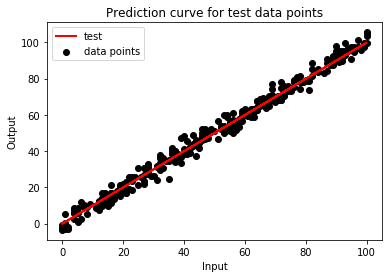

In [28]:
# plot of test data points
plt.scatter(X_test['x'],X_test['y'],color='k',label='data points')
plt.plot(test_x,predictions,'r',label='test',linewidth=2)

plt.title('Prediction curve for test data points')
plt.xlabel('Input')
plt.ylabel('Output')

plt.legend()

plt.grid(False)

plt.show()